<h1>Trabalho Prático 1 Módulo 1</h1>

<p>A primeira parte do conteúdo ministrado no módulo 1 foi sobre conceitos básicos de big data e alguns algorítmos de machine learning utilizados nesse tipo de solução. Este primeiro exercício tem como o objetivo verificar se foi aprendido sobre coleta de dados, analisar e tratar dados, criar visualizações, implementar algoritmo de ML, analisar dados.</p>

<h2>Enunciado</h2>

<p>Um gerente de recrutamento de talentos busca analisar a correlação entre a experiência profissional e os salários mensais correspondentes, expressos em milhares de dólares, de funcionários em diversos setores. Para alcançar esse objetivo, ele contratou um arquiteto de Big Data para desenvolver um modelo de regressão linear capaz de coletar e estimar o salário com base no número de meses trabalhados.A abordagem para responder a essa questão envolve a aplicação de técnicas de regressão linear aos dados coletados. O propósito é antecipar o salário que um colaborador pode receber com base na extensão de sua experiência profissional, representada pelos meses trabalhados. Adicionalmente, é crucial avaliar a qualidade do modelo gerado, o que implica verificar a conformidade com os pressupostos da regressão linear e aplicar métricas para analisar a precisão das previsões.</p>

<h2>Solução</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados/Experience-Salary.csv")

In [3]:
print(df.head())
print(df.shape)

   client_ID  exp(in months)  salary(in thousands)
0          1       18.290293             16.521825
1          2       17.023407             11.666234
2          3       26.343613             23.167255
3          4       19.105834             20.877145
4          5       27.742516             23.166236
(1000, 3)


In [15]:
df.std()

client_ID    288.819436
exp            8.717091
sal            8.844761
dtype: float64

In [53]:
print(f"Quantidade de linhas nulas em Salário: {df['sal'].isnull().sum()}")
print(f"Quantidade de linhas nulas em Experiência: {df['exp'].isnull().sum()}")

Quantidade de linhas nulas em Salário: 0
Quantidade de linhas nulas em Experiência: 0


Primeiramente verificamos os dados disponíveis. Vemos que nessa tabela existem dados de 1000 funcionarios com seu tempo de experiência e salário.<br>
O nome das colunas é muito grande então vamos trocar de "exp(in months)" para "exp" e "salary(in thousands)" para apenas "sal", mas os dados serão os mesmos visto que já sabemos que está em milhares de dólares.

In [4]:
df = df.rename(columns={"exp(in months)": "exp", "salary(in thousands)":"sal"})

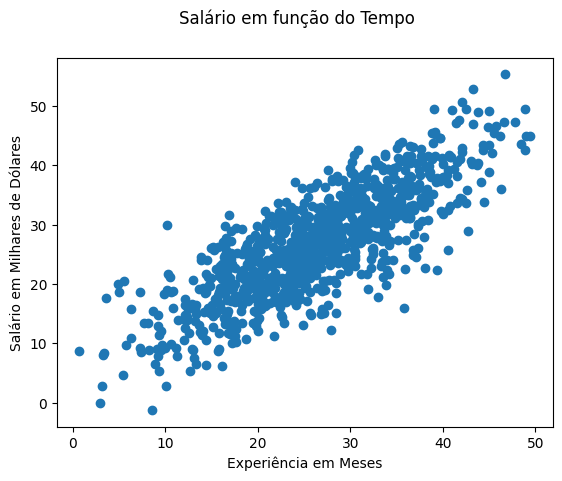

In [5]:
fig, ax = plt.subplots()
fig.suptitle("Salário em função do Tempo")

ax.scatter(df["exp"],df["sal"])
ax.set_xlabel("Experiência em Meses")
ax.set_ylabel("Salário em Milhares de Dólares")

plt.show()


Nota-se que quanto maior tempo de experiência maior o salário tende a ser. Mas, para garantir isso, é necessário fazer a correlação entre as variáveis. Ela é feita através do método de correlação de linear de Pearson.

<h3>Coeficiente de Correlação Linear de Pearson</h3>

TODO

In [6]:
def corr_de_pearson(x,y):

   n = len(x)
   sum_xy = (x*y).sum()
   sum_powx = (x*x).sum()
   sum_powy = (y*y).sum()
   sum_x = x.sum()
   sum_y = y.sum()

   r = (((n * sum_xy) - (sum_x * sum_y)) / (((n*sum_powx) - sum_x**2)**0.5 * ((n*sum_powy) - sum_y**2)**0.5))
   return r

In [7]:
corr = corr_de_pearson(df["exp"],df["sal"])
print(corr)

0.8109692945840642


Então, é possível traçar uma reta de regressão, criando uma função experiência por salário.

<h3>Regreção Linear</h3>
A função de regressão é dada por:

$$Yi = \alpha + \beta Xi + \varepsilon i$$

<p>Ela nos mostra que para cada amostra de salário podemos criar uma função relacionada a experiência somada a um erro. Fazer a regressão significa encontrar essa função. Para isso existem alguns algoritmos, os principais são: Método estatístico e o gradiente descendente.</p>
<p>Já existem bibliotecas as quais já os implementaram,  mas, como fim de aprendizado, irei desenvolver os algoritmos neste trabalho.</p>

<h4>Método Estatístico</h4>

É um algorítmo determinístico, ou seja, ele nos dá a resposta exata que pedimos apartir de fórmula. Ele funciona encontrando os valores de $\alpha$ e $\beta$ através das seguintes fórmulas:

$$\beta = \frac{n \sum XY - (\sum X * \sum Y)}{n \sum X^2 - (\sum X)^2}$$

$$\alpha = \bar {y} - \beta x$$

Assim teremos a função:
$$f(x) = \alpha + \beta x$$

Onde x é o tempo de experiência e o f(x) é o salário. Claro que nem todos os valores serão exatos, então por isso temos um $\varepsilon i$ relacionado a cada um dos salários relacionados.

In [8]:
def make_esimation(a,b,val):
   return a+b*val

In [9]:
def linear_reg_sta(x,y):

   n = len(x)
   sum_xy = (x*y).sum()
   sum_powx = (x*x).sum()
   sum_x = x.sum()
   sum_y = y.sum()
   avg_y = y.mean()
   avg_x = x.mean()

   beta = (((n * sum_xy) - (sum_x * sum_y)) / ((n*sum_powx) - sum_x**2))
   alpha = avg_y - beta*avg_x

   estimations = [make_esimation(alpha,beta,value) for value in x]

   return alpha, beta, estimations
   

In [10]:
alpha1, beta1, estimations1  = linear_reg_sta(df["exp"],df["sal"])
print(f"Alpha = {alpha1}")
print(f"Beta = {beta1}")

In [13]:
estim1 = [make_esimation(alpha1,beta1,value) for value in range(53)]

In [23]:
make_esimation(alpha1,beta1,60)

54.56951826716323

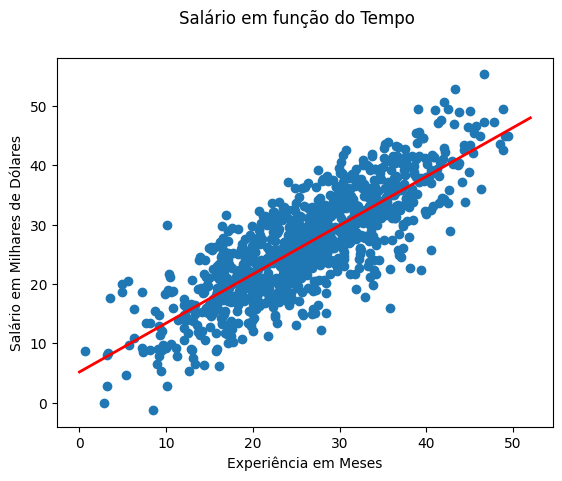

In [14]:
fig, ax = plt.subplots()
fig.suptitle("Salário em função do Tempo")

ax.scatter(df["exp"],df["sal"])
ax.plot(estim1,linewidth=2,color="red")
ax.set_xlabel("Experiência em Meses")
ax.set_ylabel("Salário em Milhares de Dólares")

plt.show()

<h4>Gradiente Descendente</h4>

<h3>Métricas de Avaliação</h3>

MSE
<br>
MAE
<br>
RMSE
<br>
SCORE

In [46]:
absolute = 0
for i in range(len(estimations1)):
   absolute += abs(estimations1[i] - df.loc[i,"sal"])
absolute = absolute/len(estimations1)
